In [1]:
from SAES.latex_generation.stats_table import Friedman
from SAES.latex_generation.stats_table import Wilcoxon
from SAES.plots.boxplot import Boxplot
from SAES.plots.CDplot import CDplot
from SAES.multiobjective.pareto_front import Front2D
from SAES.multiobjective.pareto_front import Front3D

import pandas as pd
import os

In [2]:
"""
In order to generate the HTML code from the notebook, write this command in the terminal:
jupyter nbconvert --to html --no-input multiobjective_optimization.ipynb

If you do not have jupyter installed, you can use the python terminal:
python -m nbconvert --to html --no-input multiobjective_optimization.ipynb
""";

In [9]:
# Load the experiment data
folder1 = "ZCAT2DStudyLevel250k"
folder2 = "meta2023-wfg"
folder3 = "data"

experimentData = pd.read_csv(f'{folder1}/QualityIndicatorSummary.csv')
metrics = pd.read_csv(f'{folder1}/multiobjectiveMetrics.csv')
fronts_path = f"{folder3}/data"
references_path = f"{folder1}/data/fronts"

# Comparative study of multi-objective metaheuristics

## HV quality indicator

In [4]:
metric = "HV"

In [5]:
friedman = Friedman(experimentData, metrics, metric)
friedman.show()

,NSGAII,NSGAIIDE,MOEAD,MOEADDE,SMPSO,SMSEMOA,SMSEMOADE,Friedman
ZCAT1,4.5739e-01,4.4856e-01,3.8236e-01,4.5528e-01,4.7225e-01,4.6443e-01,4.5594e-01,+
ZCAT2,7.4821e-01,6.8265e-01,7.1347e-01,7.4178e-01,7.5774e-01,7.5279e-01,6.9481e-01,+
ZCAT3,4.5423e-01,4.4184e-01,3.9152e-01,4.5397e-01,4.6008e-01,4.6266e-01,4.5025e-01,+
ZCAT4,4.5787e-01,4.4207e-01,3.8360e-01,4.5228e-01,4.5377e-01,4.6526e-01,4.5420e-01,+
ZCAT5,8.3976e-01,7.9271e-01,7.9626e-01,8.4084e-01,8.4572e-01,8.4525e-01,7.8059e-01,+
ZCAT6,4.7590e-01,3.5111e-01,4.0893e-01,4.7389e-01,4.5857e-01,4.7479e-01,3.7197e-01,+
ZCAT7,4.6850e-01,3.3128e-01,4.0623e-01,4.4802e-01,4.6750e-01,4.6846e-01,3.6666e-01,+
ZCAT8,1.8032e-01,1.3878e-01,1.0475e-01,1.7424e-01,1.8370e-01,1.8420e-01,1.5374e-01,+
ZCAT9,1.8221e-01,1.5072e-01,9.3748e-02,1.7621e-01,1.9328e-01,1.8579e-01,1.6165e-01,+
ZCAT10,3.8785e-02,0.0000e+00,7.0956e-04,2.8182e-02,3.4216e-02,4.0012e-02,0.0000e+00,+


## Wilcoxon rank-sum test table

In [6]:
wilcoxon = Wilcoxon(experimentData, metrics, metric)
wilcoxon.show()

,NSGAIIDE,MOEAD,MOEADDE,SMPSO,SMSEMOA,SMSEMOADE
NSGAII,++++++++++++++++++++,++++++++++++++++++++,=+====+++++=++++=+++,-====+==-===========,-----==--=--=-==---=,=+==++++++++++++++++
NSGAIIDE,,+-++=--++-==-+=+=-+-,=-=-----------------,--------------------,--------------------,===-===-=======+-===
MOEAD,,,--------------------,--------------------,--------------------,-=--=++--====-=-=+-+
MOEADDE,,,,--==-+==-=-=--=-=-=-,-----==---------=---,=+==+++++++++=++++++
SMPSO,,,,,=====-==+===========,+++=+++=++++++++++++
SMSEMOA,,,,,,++++++++++++++++++++


## Critical distance ranking

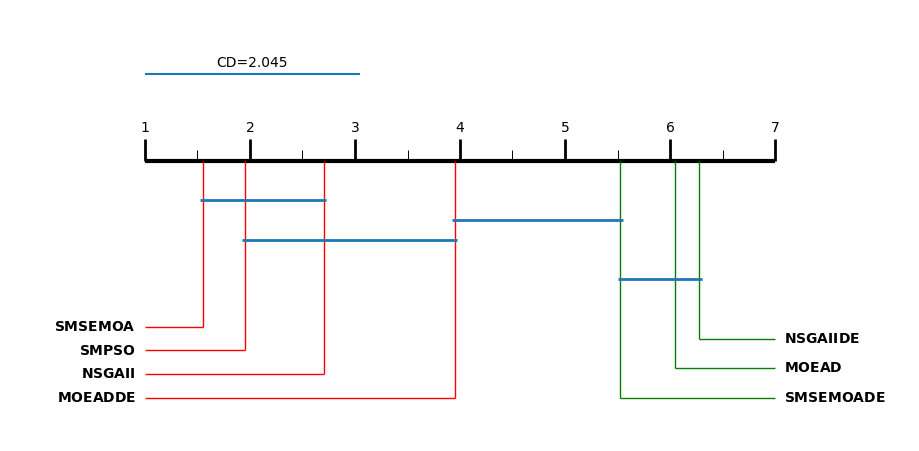

In [7]:
cdplot = CDplot(experimentData, metrics, metric)
cdplot.show()

## Boxplot + Pareto Fronts for each problem

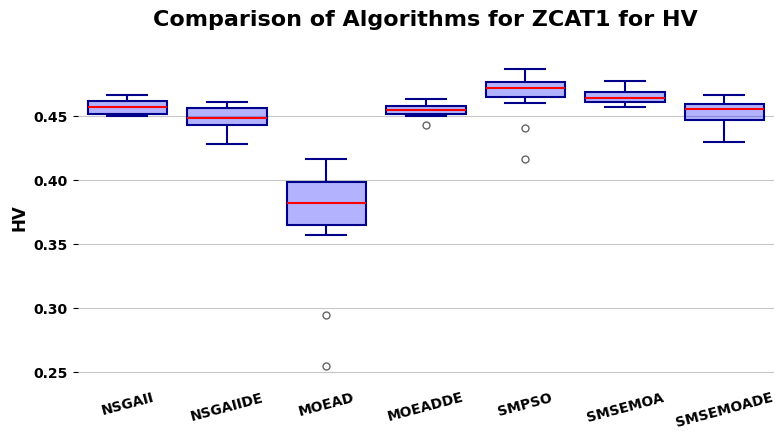

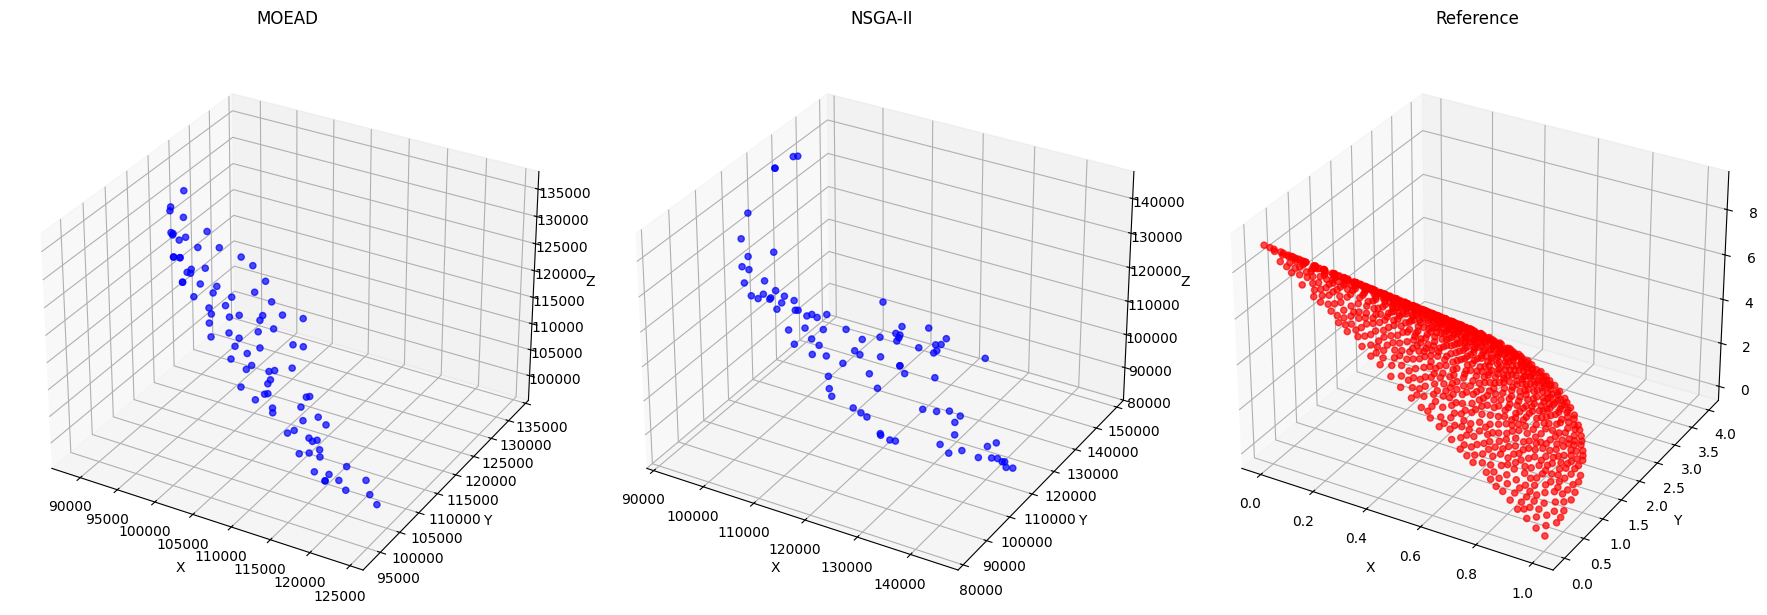

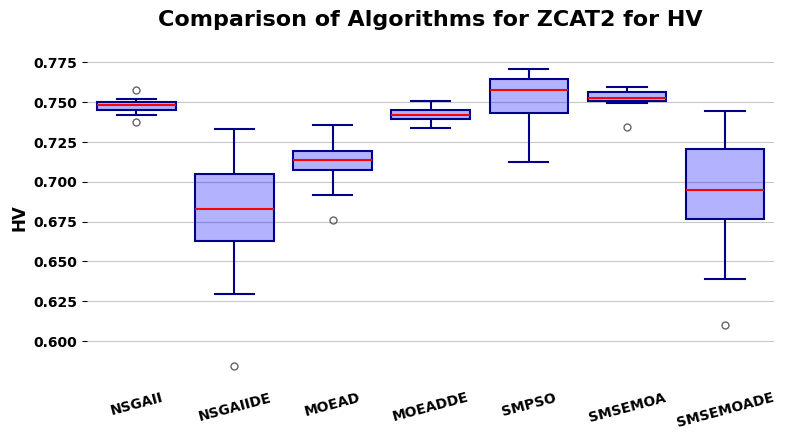

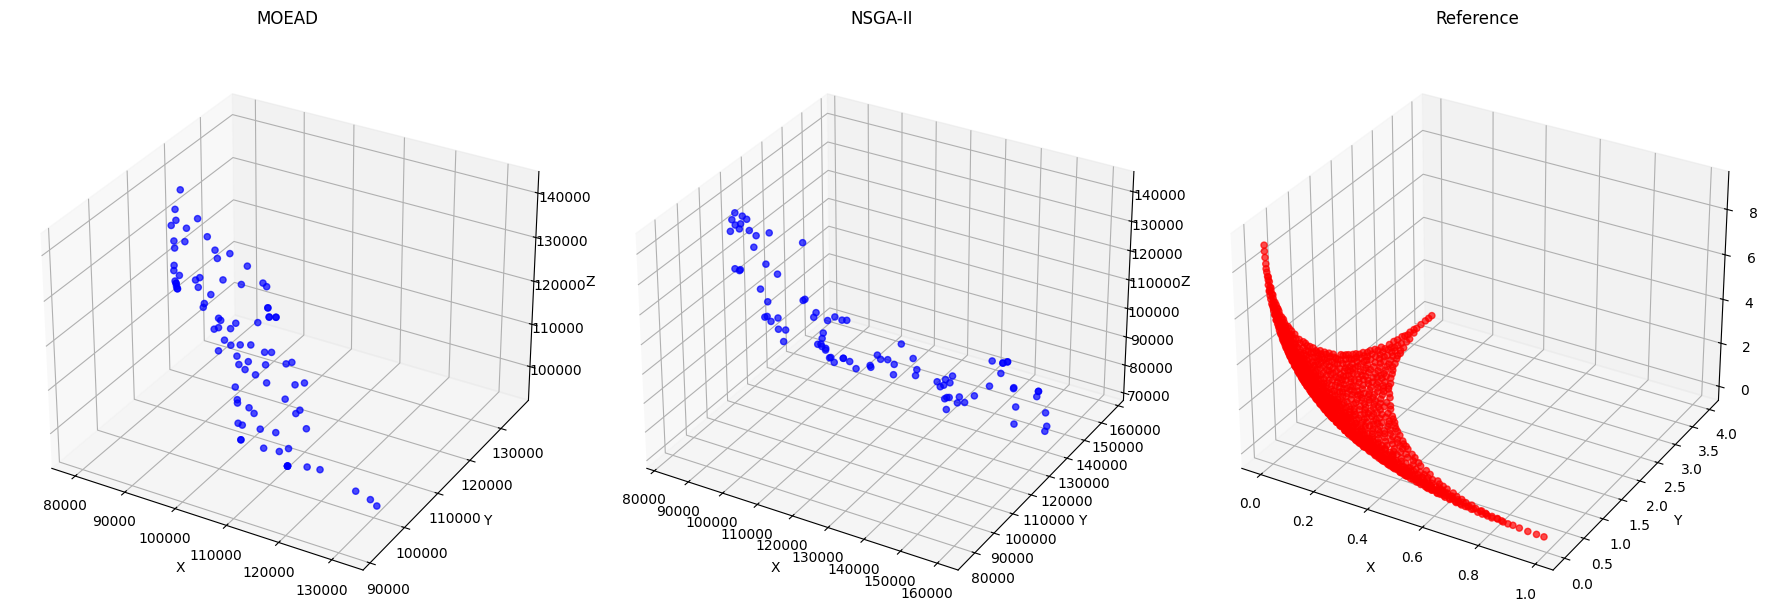

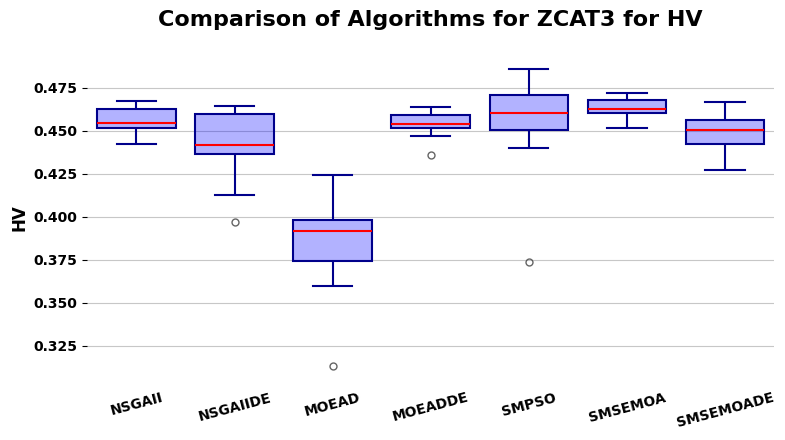

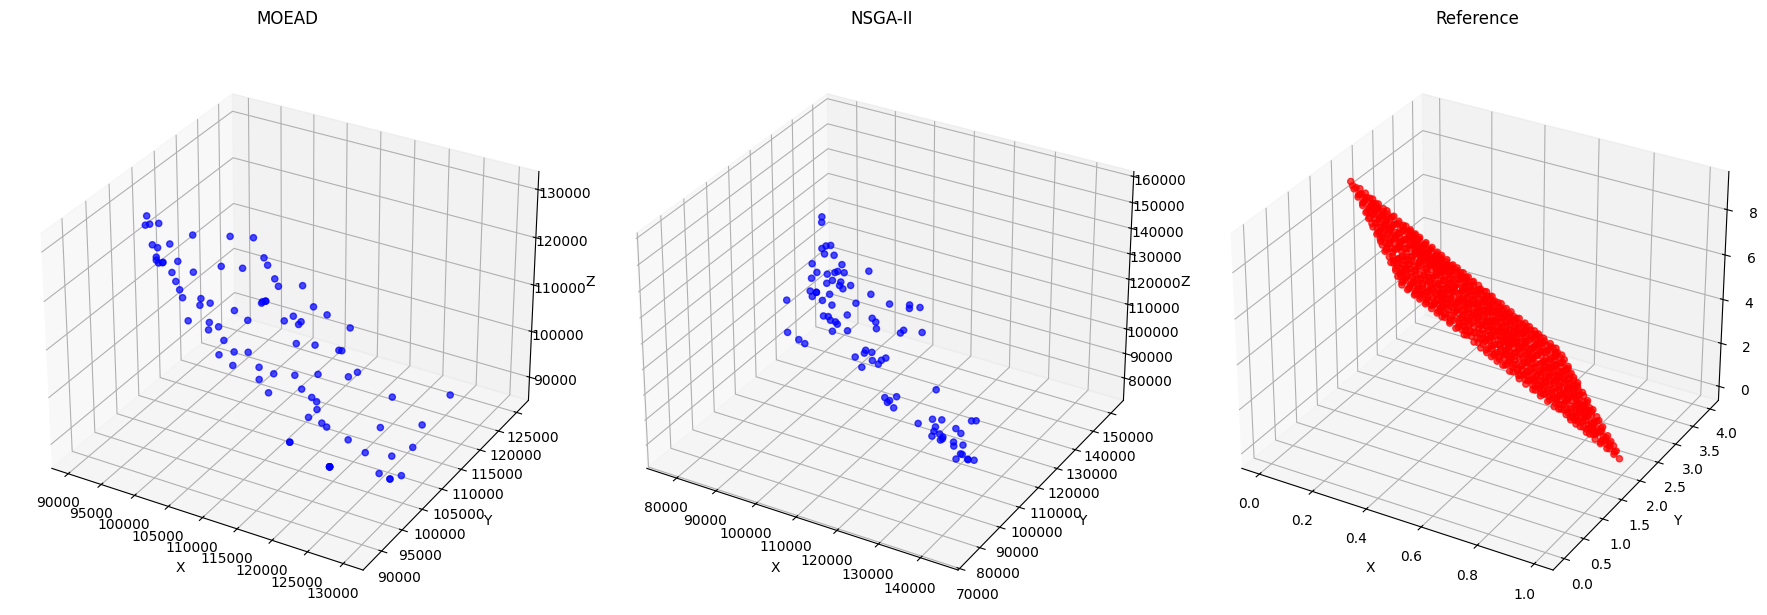

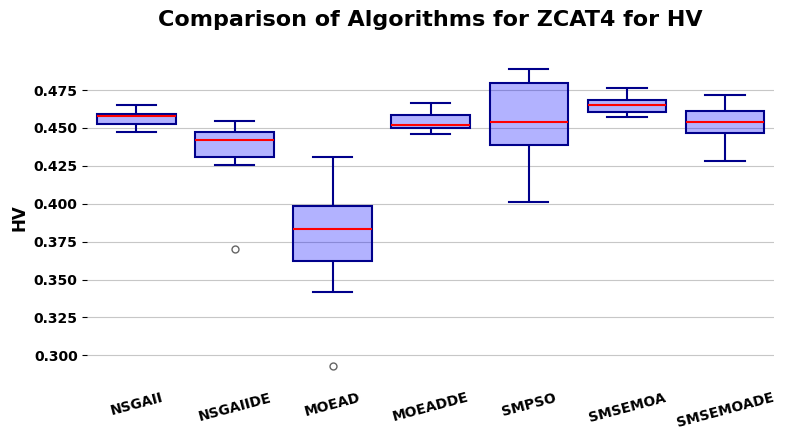

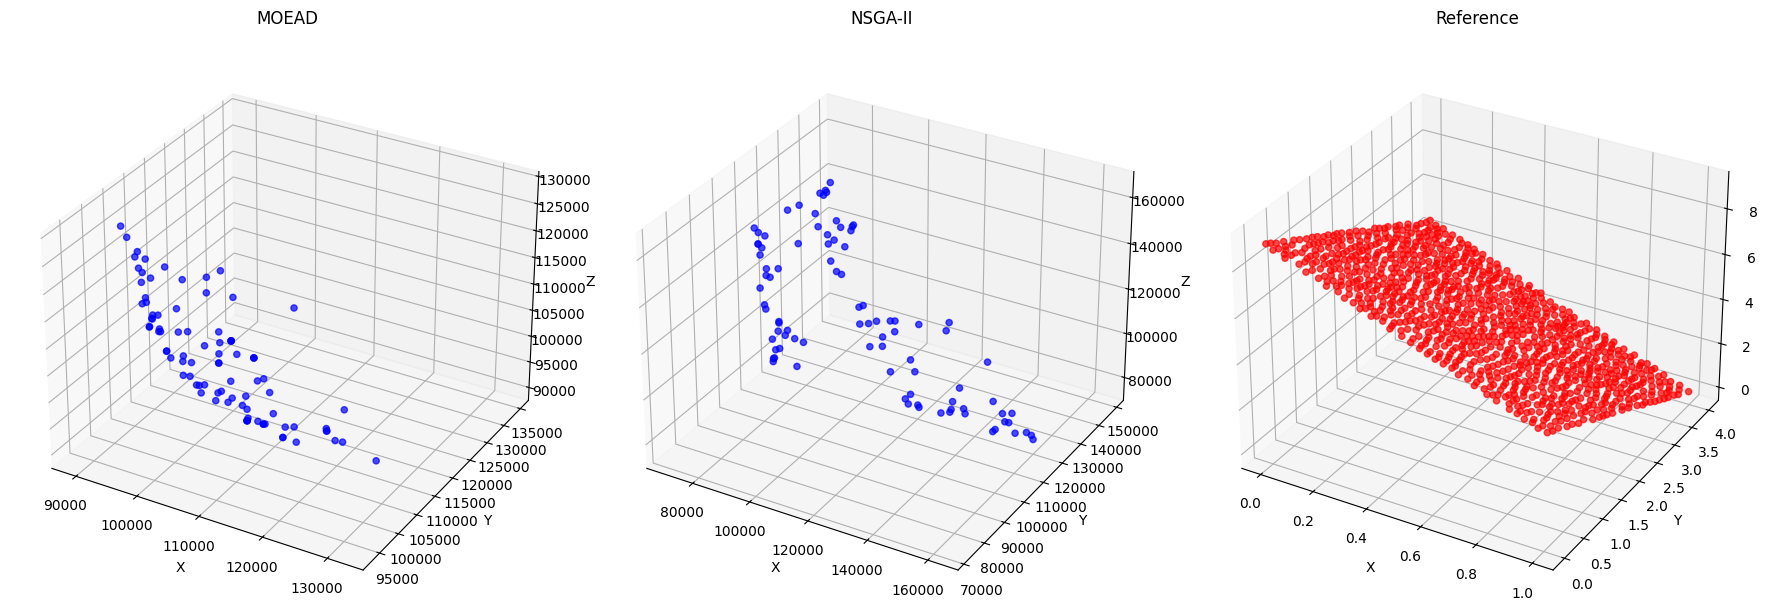

In [11]:
front = Front3D(fronts_path, references_path, metric)
boxplot = Boxplot(experimentData, metrics, metric)

for instance in front.instances:
    boxplot.show_instance(instance)
    front.show(instance, median=True)
    print("\n"*6)